 Preparar los datos para desarrollar un modelo de regresión logística en la EON Escuela Online de Negocios, optimizando la conversión de prospectos en estudiantes.

In [1]:
# Importamos las librerias necesarias
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn  as sns

In [23]:
# procedemos a cargar los datos 
df = pd.read_csv("EON.csv")

In [24]:
# visualizamos el archivo
df.head() 


,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [25]:
# Eliminamos la columna Prospect ID
df.drop(columns= 'Prospect ID', axis = 1, inplace= True)

In [26]:
# Procedemos a poner la columna Lead Number como indice
df.set_index('Lead Number', inplace=True)

In [27]:
# Visualizamos de nuevo el df
df

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
Lead Number,,,,,,,,,,,,,,,,,,,,,
660737,API,Olark Chat,No,No,0,0.0,0,0.00,Page Visited on Website,NaN,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
660728,API,Organic Search,No,No,0,5.0,674,2.50,Email Opened,India,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,Email Opened,India,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,Unreachable,India,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,Converted to Lead,India,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
579564,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,Email Marked Spam,Saudi Arabia,...,No,Potential Lead,Mumbai,02.Medium,01.High,15.0,17.0,No,No,Email Marked Spam
579546,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,SMS Sent,India,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,19.0,No,Yes,SMS Sent
579545,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,SMS Sent,India,...,No,Potential Lead,Mumbai,02.Medium,01.High,13.0,20.0,No,Yes,SMS Sent


In [8]:
# Visualizamos el tipo de datos del df y revisamos los datos nulos 
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9240 entries, 660737 to 579533
Data columns (total 35 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Country                                        677

<Axes: xlabel='count', ylabel='Lead Source'>

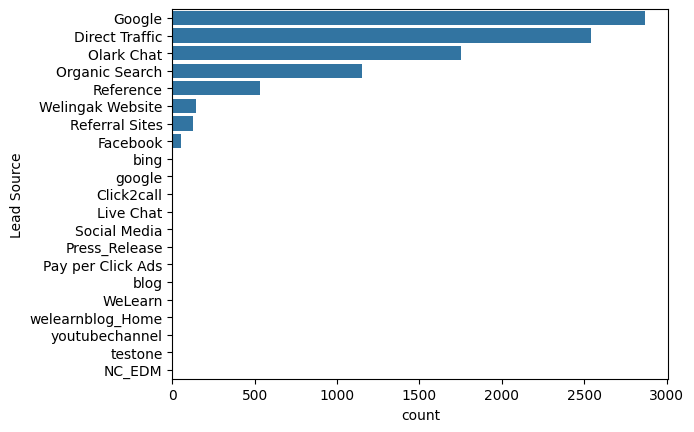

In [28]:
# realizamos un grafico contando Lead Source
sns.countplot(y='Lead Source', data = df, order = df['Lead Source'].value_counts().index)

Si en el analisis exploratorio de datos hubieramos identificado una fuente de trafico (Lead Source) que fuera claramente la mas comun, La estrategia mas directa habria sido reemplazada por los valores faltantes con la fuente de trafico mas frecuente, es decir, la moda. Esto se basa en la suposicion de que es mas probable que un nuevo lead provenga de la fuente mas comun. Como no es el caso, simplemente asignaremos el valor "Desconocido" a los valores faltantes.

In [29]:
# Procedemos a llenar los valores faltantes
df['Lead Source'] = df['Lead Source'].fillna('Desconocido') 

Correcion de Tipo de Datos: Do Not Email, Do Not Call Converted

Do Not Email: Una variable indicadora seleccionada por el cliente donde eligen si desean o no recibir correos electronicos sobre el curso. 

Do Not Call: Una variable indicadora seleccionada por el cliente donde eligen si desean o no ser llamados sobre el curos. 

Converted: La variable objetivo. Indica si un lead ha sido convertido exitosamente o no.

In [30]:
# Convertimos las variables a booleanos. Como haremos lo mismo con las tres, hagamos un lazo for
for v in ['Do Not Email', 'Do Not Call', 'Converted']:
    df[v] = df[v].replace('Yes', 1)
    df[v] = df[v].replace('No', 0)
    df[v] = df[v].astype(bool)

C:\Users\dave1\AppData\Local\Temp\ipykernel_4992\2702940210.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[v] = df[v].replace('No', 0)
C:\Users\dave1\AppData\Local\Temp\ipykernel_4992\2702940210.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[v] = df[v].replace('No', 0)


Manejo de Valores Nulos: TotalVisit y Page Views Per Visit

TotalVisits: El numero total de visitas realizadas por el cliente en el sitio web.

Page Views Per Visit: El numero total de paginas visitadas por el cliente durante sus visitas en el sitio web.

Evaluamos la distribucion de cada una de estas caracteristicas para determinar el mejor metodo de imputacion

In [31]:
# examinamos la distribucion de Total Visit
df['TotalVisits'].describe()

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

<Axes: xlabel='TotalVisits', ylabel='Count'>

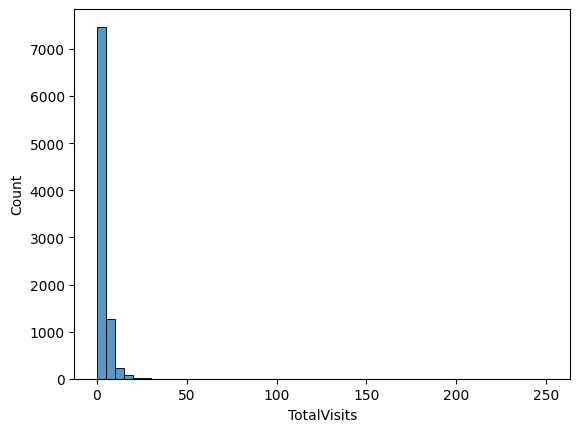

In [32]:
# Realizamos un histograma de distribucion
sns.histplot(x='TotalVisits', data=df, bins=50)

In [33]:
# Examinamos la distribucion de 'Page Views Per Visit'
df['Page Views Per Visit'].describe()

count    9103.000000
mean        2.362820
std         2.161418
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

<Axes: xlabel='Page Views Per Visit', ylabel='Count'>

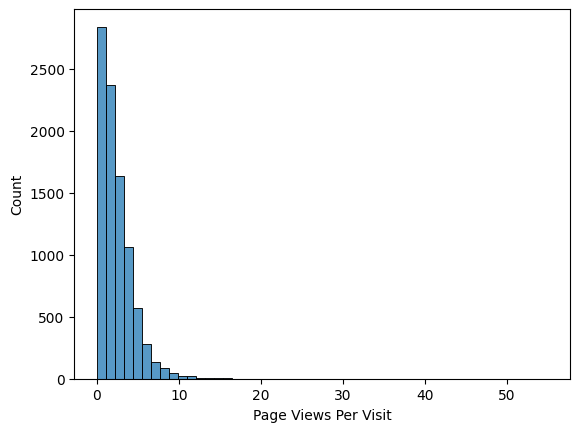

In [34]:
sns.histplot(x='Page Views Per Visit', data=df, bins=50)

In [9]:
# Convertir la columna 'Lead Source' a string y manejar valores nulos
df['Lead Source'] = df['Lead Source'].astype(str).fillna('Desconocido')

Cuando una distribucion esta severamente sesgada, el uso de la mediana para imputar valores faltantes es apropiado porque la mediana es menos susceptible a la influencia de los valores atipicos o extremos, proporcionando una mejor estimacion central para datos sesgados. 

Si la distribucion de estas caracteristicas no estuviera sesgada y, en cambio fuera normal(simetrica), podriamos considerar usar la media para la imputacion de valores faltantes. La media es una medida buena y representativa de tendencia central para distribuciones que no estan sesgadas, ya que en una distribucion normal, la media y la medidana son practicamente iguales.

In [35]:
# Imputamos la mediana para los valores faltantes de TotalVisits
df['TotalVisits'] = df['TotalVisits'].fillna(df['TotalVisits'])

In [36]:
# Imputamos la mediana para los valores faltantes de Page Views Per Visit
df['Page Views Per Visit'] = df['Page Views Per Visit'].fillna(df['Page Views Per Visit'])

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9240 entries, 660737 to 579533
Data columns (total 35 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9240 non-null   object 
 2   Do Not Email                                   9240 non-null   bool   
 3   Do Not Call                                    9240 non-null   bool   
 4   Converted                                      9240 non-null   bool   
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Country                                        677

# Preprocesamiento II

Manejo de valores nulos: Ultima Actividad

Las Activity: Ultima actividad realizada por el cliente. Incluye apertura de email, conversacion en Olark, Chat, etc. Evaluar la distribucion de la caracteristica para determinar el mejor metodo de imputacion de valores nulos. 

<Axes: xlabel='count', ylabel='Last Activity'>

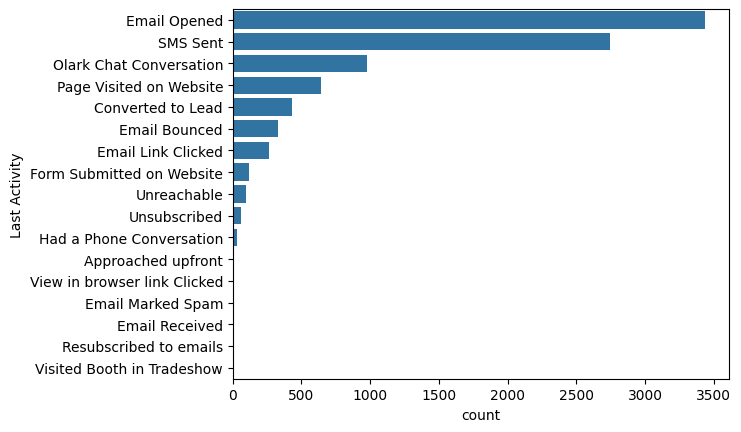

In [38]:
# Realizamos un grafico de Distribucion de Last Activity
sns.countplot(y='Last Activity', data = df, order = df ['Last Activity'].value_counts().index)

El preprocesamiento de datos es una fase escencial en cualquier proyecto de ciencia de datos, ya que no solo limpia los datos, sino que tambien ofrece la oportunidad de entender profundamente las caracteristicas y la naturaleza de los datos con los que estamos trabajando. A traves de la visualizacion, como en el grafico anterior, podemos obtener una comprension mas rica y detallada de los datos que va mas alla de una simple descripcion textual.

Por ejemplo, un grafico de la distribucion de la "ultima Actividad de los clientes revela patrones de comportamiento, preferencias y posiblemente la efectividad de diferentes canales de comunicacion. Observa que ninguna de las actividades domina claramente sobre las demas (con un umbral superior al 80-95%), nos sugiere que no hay una tendencia unica en la forma en que los clientes interactuan con las empresas. 

En tal escenario, es razonable asignar el valor "Desconocido" a los registros faltantes en "Ultima Actividad". Esto mos permite mantener la integridad de los datos sin introducir un sesgo hacia una actividad en particular que no es representativa de la mayoria. Al hacer esto, reconocemos y registramos la ausencia de informacion, en lugar de asumir incorrectamente las actividad predominante. 

Es importante recalcar que este enfoque no solo es practico desde el punto de vista de la gestion de datos faltantes, sino que tambien es valioso desde una perspectiva analitica, ya que nos permite identificar y reconocer las limitaciones desde nuestros datos y posiblemente planear preguntas para futuras investigaciones o estrategias de recopilacion de datos mas efectiva.

In [39]:
# llenamos datos faltantes con valor desconocido
df['Last Activity'] = df['Last Activity'].fillna('Desconocido')

<Axes: xlabel='count', ylabel='Country'>

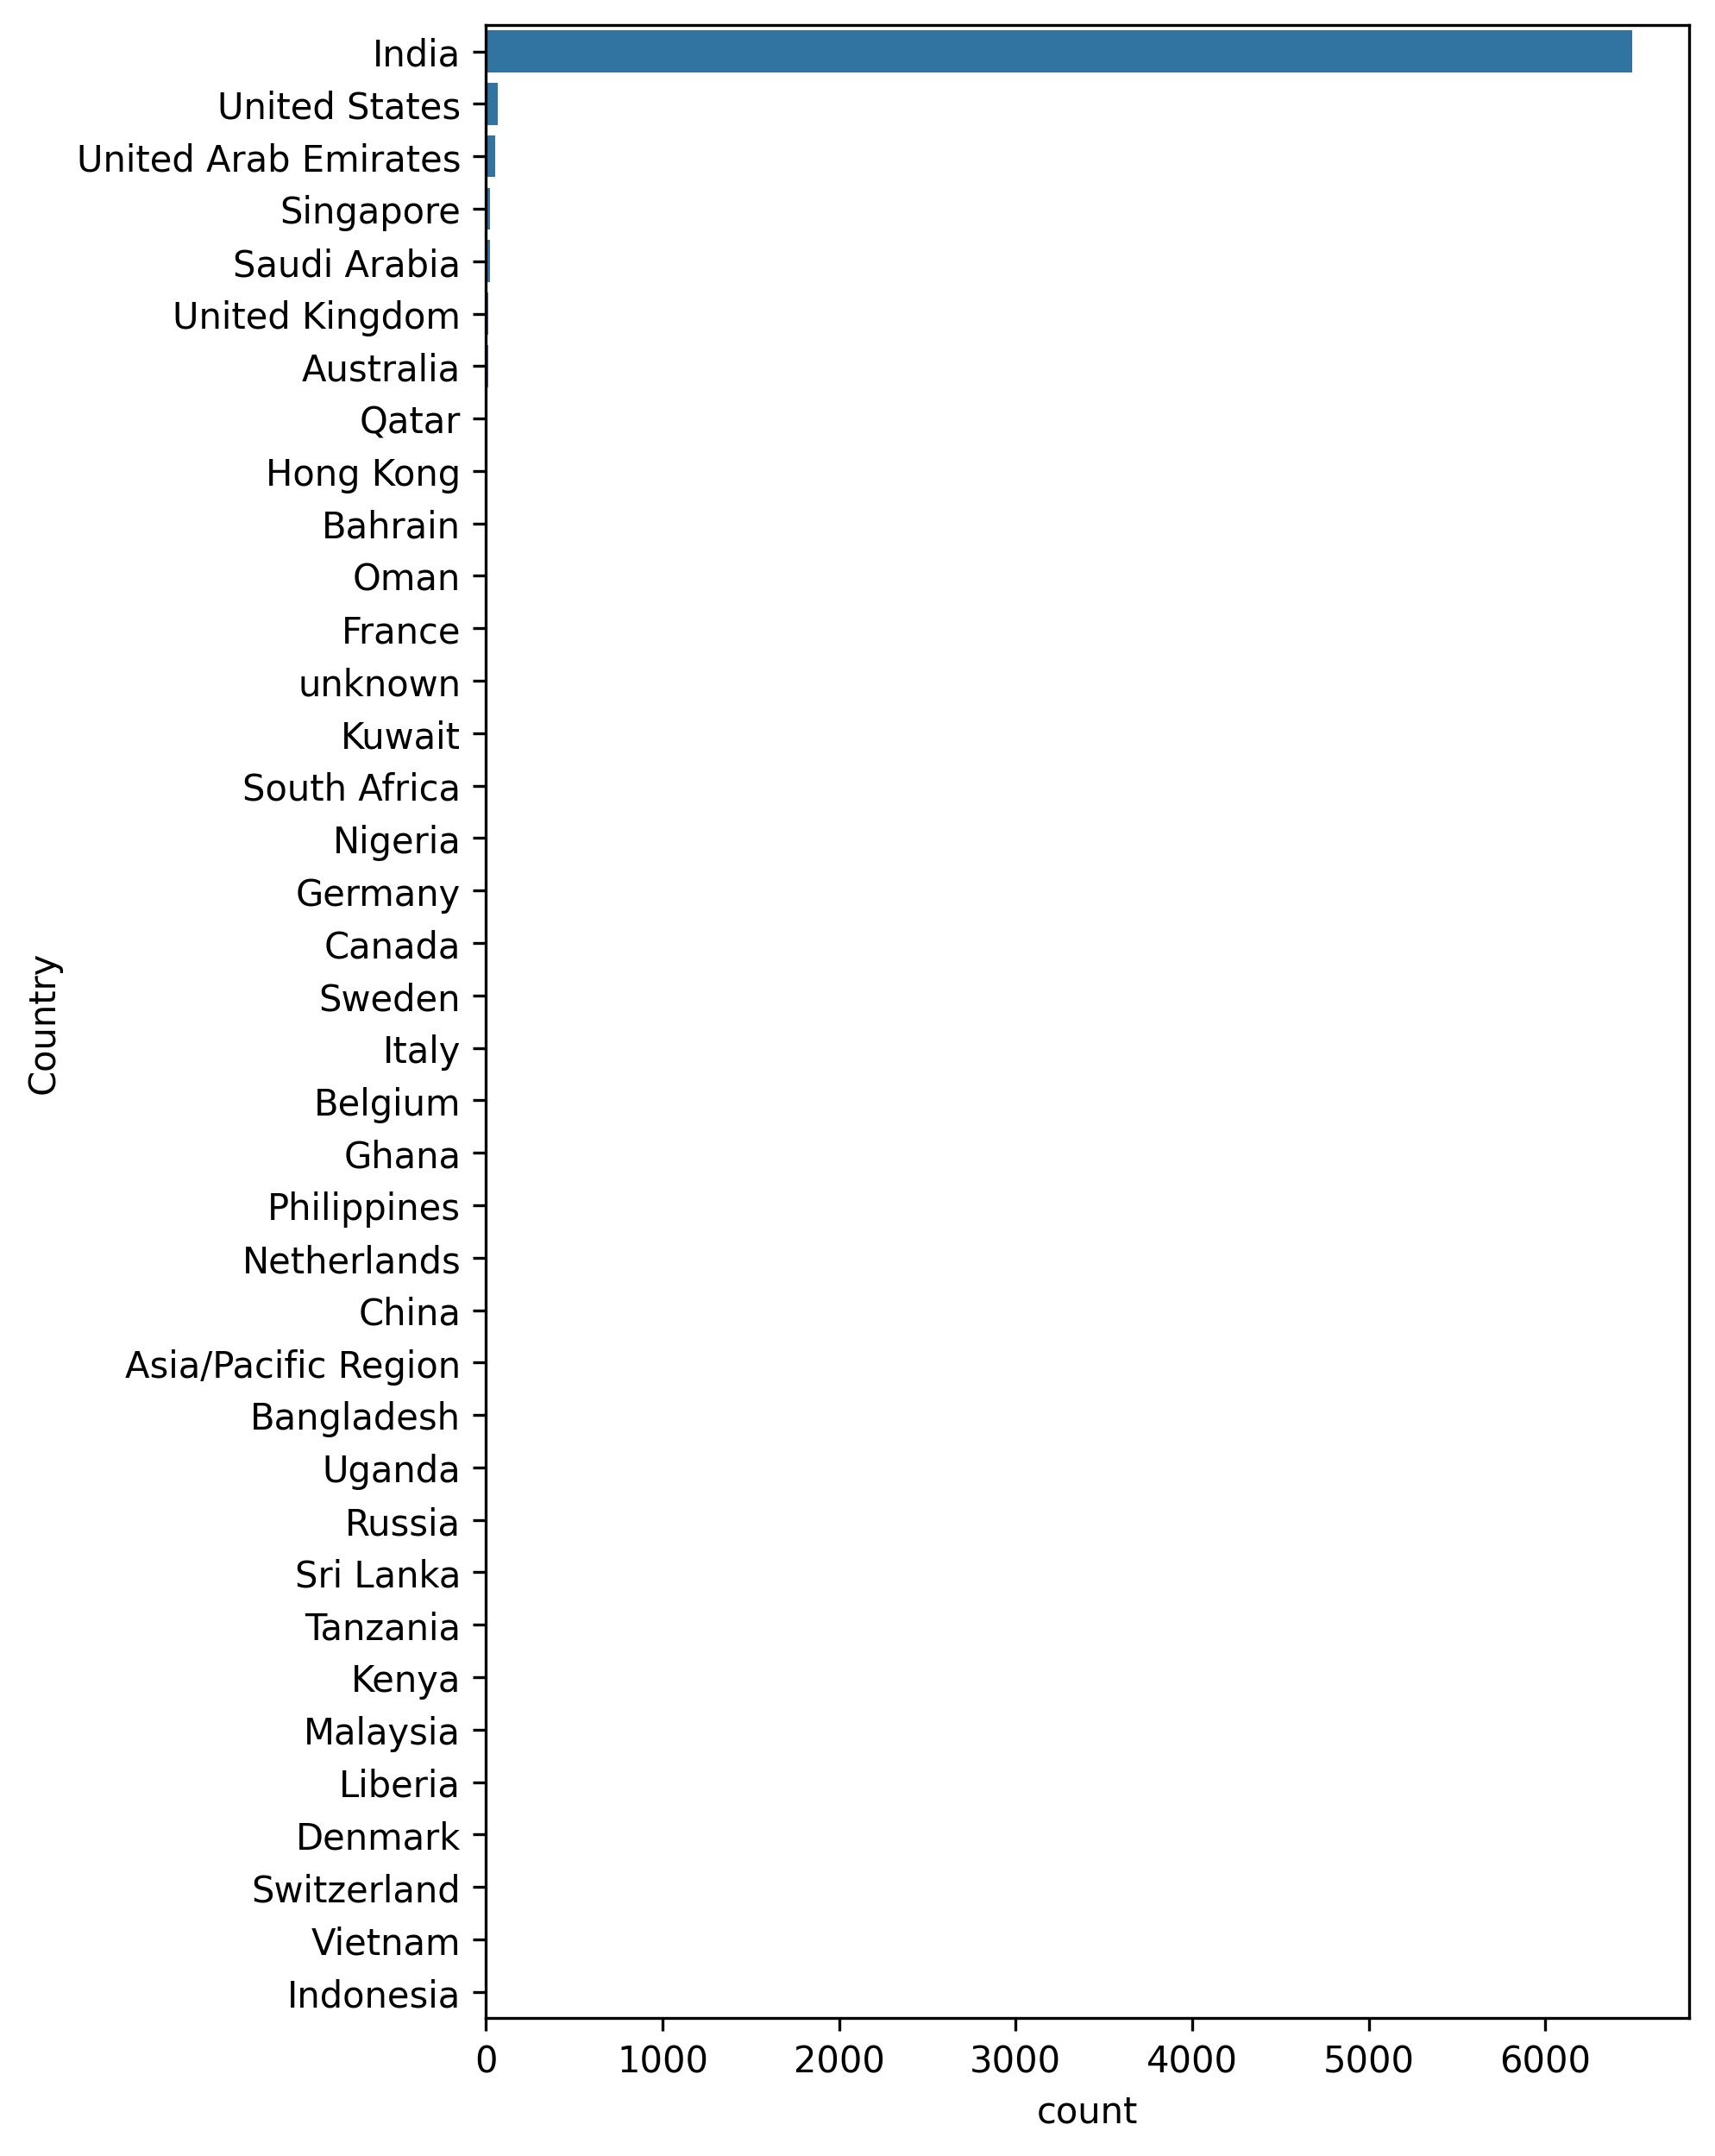

In [41]:
# Analizamos Country: el pais del Lead
# Graficamos la distribucion de leads por pais
plt.figure(figsize = (6,10), dpi = 300)
sns.countplot(y='Country', data = df, order = df ['Country'].value_counts().index)

El numero de datos faltantes es mas de la cuarta parte, y mas de dos terceras partes son de la India.

En este caso particular, no quisieramos colocar simplemente 'Desconocido' cuando sabemos que es muy probable que sean de la India y cuando tenemos otra variable (City) que nos puede ayudar a deducir el pais de los faltantes


<Axes: xlabel='count', ylabel='City'>

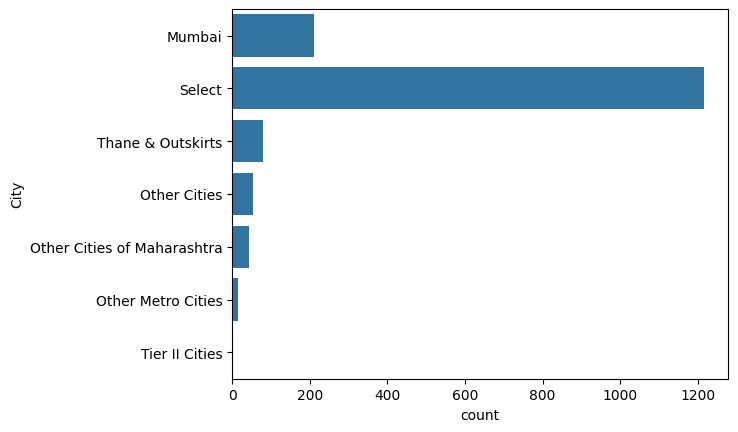

In [45]:
# Graficamos la distribucion de 'City' cuando 'Country' es un dato faltante
#plt.figure(figsize = (6,10), dpi = 300)
sns.countplot(y='City', data = df[df['Country'].isna()],order = df['City'].value_counts().index)

El analisis de esta variable nos da insights muy relevantes para el tratamiento de los faltantes de 'Country', procedemos a asignar 'india' para faltantes que tengan como Ciudad: Munbai, Other Cities of Mahrashtra y Thane & Outskirts, creamos un lazo for con un if anidado, para los registros en la lista de las tres ciudades_india asignamos India, para el resto asignamos desconocido 

In [46]:
# creamos una variable que contenga las ciudades de la india
ciudades_india = ['Mumbai', 'Other Cities of Maharashtra', 'Thane & Outskirts']

In [48]:
for i in df[df['Country'].isnull()].index:
    if df.loc[i, 'City'] in ciudades_india:
        df.loc[i, 'Country'] = 'india'
    else:
        df.loc[i, 'country'] = 'Desconocido'

Explicacion del lazo for con if

for i in df[df["Country].isnull()].index:

df["Country"].isnull(): Esta parte del codigo crea una Serie booleana que es un True cuando el valor en la columna 'Country' es NaN (Valor Faltante).

df[df["Contry"].sinull()]: Aqui, se utiliza la Serie booleana para filtrar el DataFrame df, seleccionando solo las filas donde "Contry" es NaN.

.idex: Este atributo devuelve los indices de todas las filas que cumplen con la condicion anterior(es decir, las filas con valores faltantes en 'Country')

La instruccion for i in itera sobre estos indices, asinando a i cada indice de fila correspondiente a un valor faltante en 'Country'

df.loc[i, 'Country'] = 'India y df.loc[i, 'Country'] = 'Desconocido'

Si la condicion del if es verdadera (lo que significa que la ciudad de la fila i es una de las ciudades_india), entonces el valor de 'Country' para esa fila se establece en 'India'.

Si la condicion del if es falsa (la ciudad de la fila de i no esta en ciudades_india o la ciudad tambien es NaN), entonces el valor de 'Country' para esa fila se estableces en 'desconocido'


# Correccion de Tipo de Datos: Search, Magazine, Newspaper Article, X Education Forums, Newspaper, Digital Advertisement

Corrección de Tipo de Datos: Search, Magazine, Newspaper Article, X Education Forums, Newspaper, Digital Advertisement¶

Search: Indica si el cliente ha visto el anuncio en cualquiera de los ítems listados (por ejemplo, durante una búsqueda en la web).

Magazine: Indica si el cliente ha visto el anuncio en cualquiera de los ítems listados (por ejemplo, en una revista).

Newspaper Article: Indica si el cliente ha visto el anuncio en cualquiera de los ítems listados (por ejemplo, en un artículo de periódico).

X Education Forums: Indica si el cliente ha visto el anuncio en cualquiera de los ítems listados (por ejemplo, en un foro de X Education).

Newspaper: Indica si el cliente ha visto el anuncio en cualquiera de los ítems listados (por ejemplo, en un periódico).

Digital Advertisement: Indica si el cliente ha visto el anuncio en cualquiera de los ítems listados (por ejemplo, en un anuncio digital).

Through Recommendations: Indica si el cliente llegó a través de recomendaciones.

Receive More Updates About Our Courses: Indica si el cliente eligió recibir más actualizaciones sobre los cursos.

Estas características serán más fáciles de manipular, interpretar y utilizar en un modelo convirtiéndolas en valores booleanos.

In [52]:
for c in ['Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 
          'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses']:
    df[c] = df[c].replace('Yes', 1)
    df[c] = df[c].replace('No', 0)
    df[c] = df[c].astype(bool)

C:\Users\dave1\AppData\Local\Temp\ipykernel_4992\60662132.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[c] = df[c].replace('No', 0)


In [53]:
# visualizamos de nuevo las variables
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9240 entries, 660737 to 579533
Data columns (total 36 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9240 non-null   object 
 2   Do Not Email                                   9240 non-null   bool   
 3   Do Not Call                                    9240 non-null   bool   
 4   Converted                                      9240 non-null   bool   
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9240 non-null   object 
 9   Country                                        711

 Manejo de Valores Nulos: Specialization, How did you hear about X Education, What is your current occupation, What matters most to you in choosing a cours

Specialization: El dominio de la industria en el que el cliente trabajó anteriormente. Incluye el nivel 'Select Specialization', lo que significa que el cliente no seleccionó ninguna opción mientras llenaba el formulario.

How did you hear about X Education: La fuente de la cual el cliente se enteró sobre X Education.

What is your current occupation: Indica si el cliente es un estudiante, desempleado o empleado.

What matters most to you in choosing a course: Una opción seleccionada por el cliente indicando cuál es su principal motivo detrás de hacer este curso.

Evalúa la distribución de estas características para determinar el mejor método de imputación de valores nulos. Perfectamente podrían hacerlo uno a uno, o podríamos hacer uso del lazo for par automatizar el proceso.

In [54]:
# Examinemos la distribucion de las variables de formulario, vamos a hacer una lista de las 4 variables, y luego haremos un lazo for para graficarlas como subplots
variables = ['Specialization', 'How did you hear about X Education', 
             'What is your current occupation', 'What matters most to you in choosing a course']

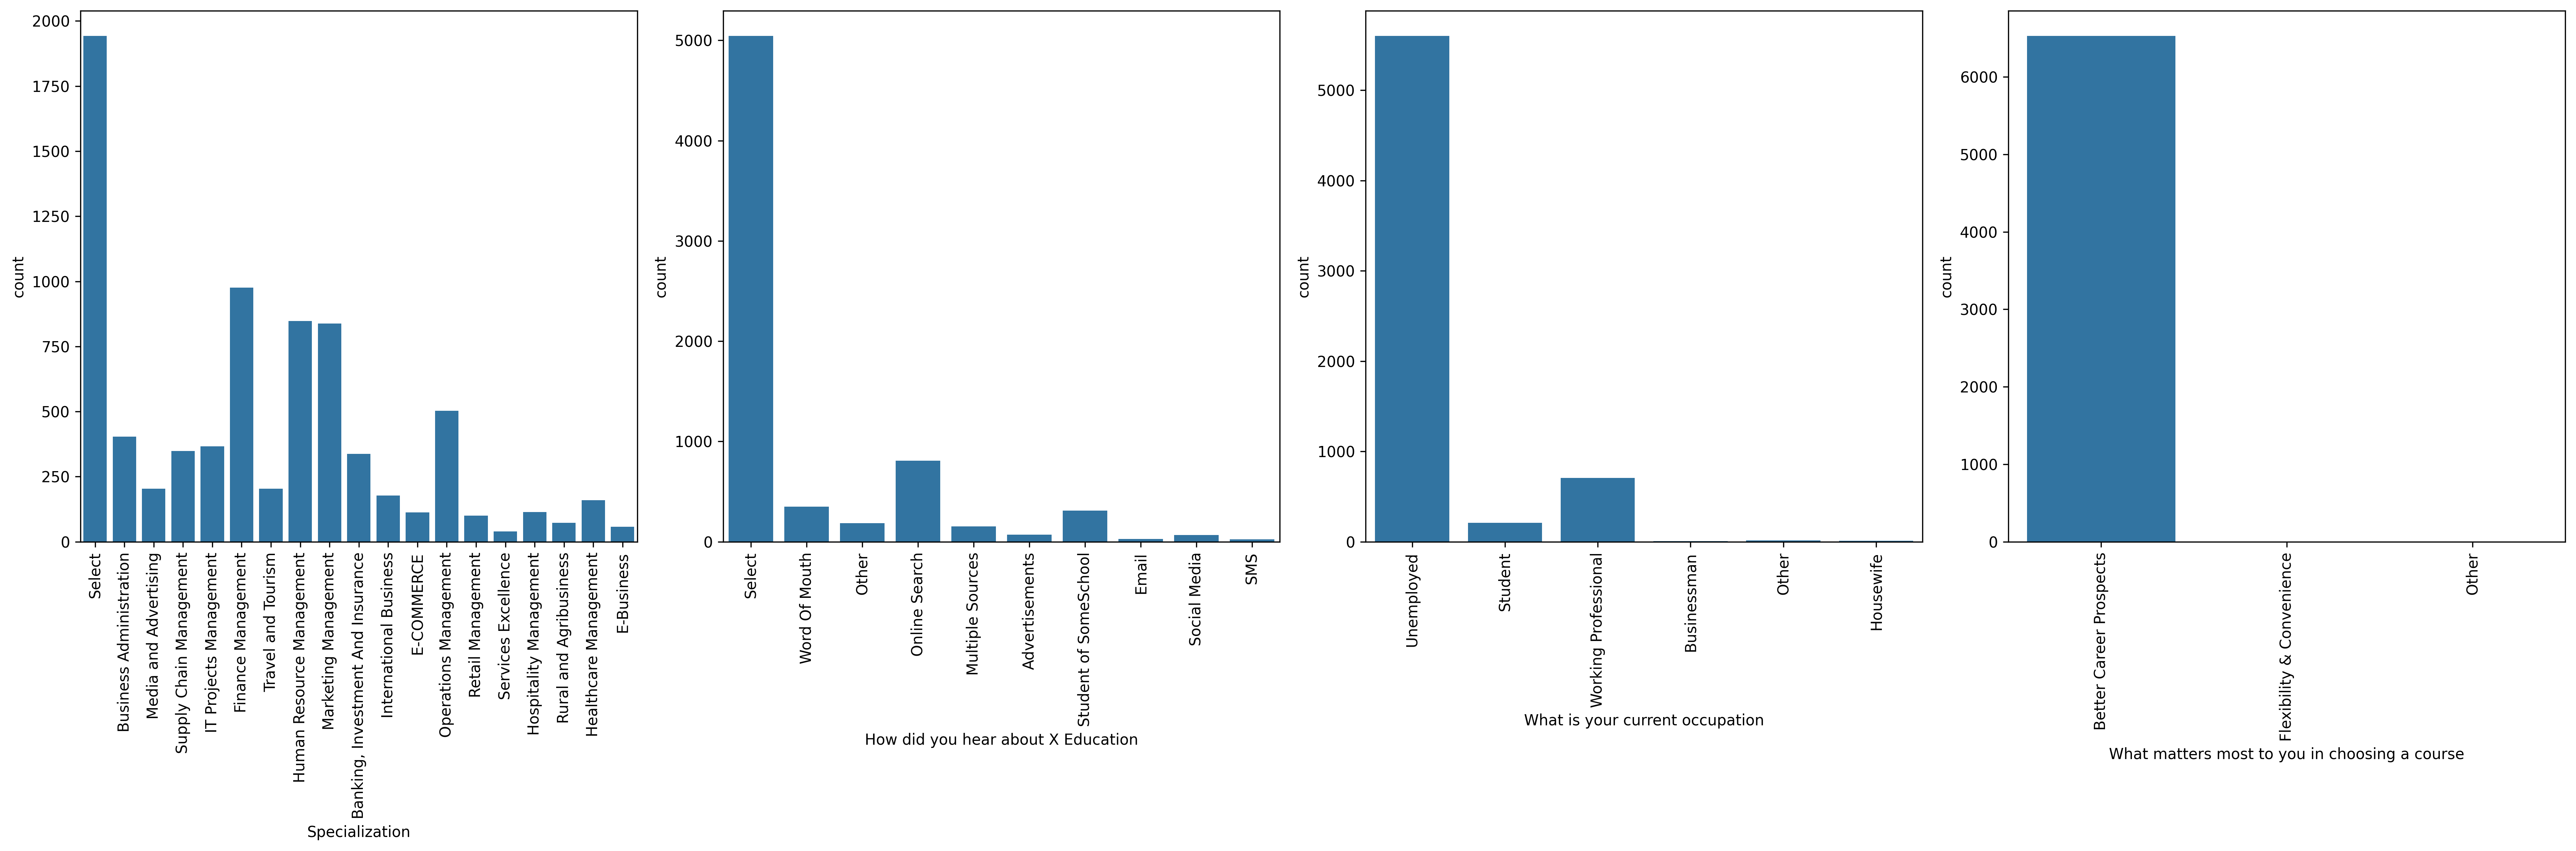

In [56]:
# procedemos a graficar con un lazo for

fig, ejes = plt.subplots(nrows=1, ncols=4, figsize=(24,8), dpi= 300)
for i in range(4):
    sns.countplot(x=variables[i], data = df, ax=ejes[i])
    plt.sca(ejes[i])
    plt.xticks(rotation=90)
plt.tight_layout()

Los gráficos muestran la distribución de valores para una o más variables categóricas de un conjunto de datos, donde un gran número de observaciones tiene la etiqueta "Select". En el contexto del análisis de datos, la etiqueta "Select" a menudo se usa en los formularios de entrada de datos para indicar que el usuario no ha seleccionado ninguna de las opciones disponibles. En el análisis posterior, estos valores son efectivamente equivalentes a valores nulos o faltantes, ya que no proporcionan información útil sobre la categoría real.

Es importante destacar que, en el gráfico de 'What matters most to you in choosing a course', que se encuentra a la derecha, nos encontramos con un caso que permite una posible imputación de valores faltantes con la opción 'Better Career Prospects'. Esta categoría domina claramente sobre 'Flexibility & Convenience' y 'Others', indicando que la mayoría de los encuestados priorizan las perspectivas de carrera al elegir un curso. Si se considerara apropiado, se podría imputar la moda a los valores faltantes, asumiendo que es muy probable que los datos faltantes correspondan a la opción de mejores perspectivas de carrera debido al abrumador número de observaciones que la respaldan.

Sin embargo, por una cuestión de coherencia y para preservar la integridad de los datos, optaremos por asignar el valor 'Desconocido' a los datos faltantes. Cabe señalar que, de todas las variables en nuestro proceso de preprocesamiento, 'What matters most to you in choosing a course' sería el ejemplo más claro para justificar la imputación de valores faltantes utilizando la moda.

In [57]:
# Reemplacemos los valores 'Select' y faltantes con 'Desconocido'
for c in variables:
    df[c].replace('Slect', 'Desconocido', inplace = True)
    df[c].fillna('Desconocido', inplace = True)

C:\Users\dave1\AppData\Local\Temp\ipykernel_4992\630186372.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[c].replace('Slect', 'Desconocido', inplace = True)
C:\Users\dave1\AppData\Local\Temp\ipykernel_4992\630186372.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For ex

Eliminar variable: Tags

Tags: Etiquetas asignadas a los clientes que indican el estado actual del potencial cliente.

Dado que Tags está determinado por el progreso de un potencial cliente a través del embudo de marketing, es probable que sea endógeno al estado de conversión del potencial cliente. Como resultado, esta característica debería eliminarse.

Un poquito teoría: El término "endógeno" se refiere a factores o variables que se originan dentro de un sistema determinado, en contraposición a los que vienen de afuera o son "exógenos". En el contexto de un modelo estadístico o económico, una variable endógena es aquella cuyo valor es influenciado por otras variables dentro del modelo.

Por ejemplo, si hablamos de un modelo que intenta predecir la conversión de clientes potenciales (leads) a clientes reales, una variable endógena sería una que está directamente relacionada con el proceso de conversión internamente, como la interacción del cliente con el embudo de ventas, y que puede ser afectada por otros factores del mismo sistema, como las estrategias de marketing aplicadas. En otras palabras, si la variable 'Tags' se asigna a medida que el cliente avanza a través del embudo de marketing y está directamente relacionada con la probabilidad de que se convierta en cliente, entonces es endógena al modelo de conversión de leads, porque es tanto una consecuencia como una parte del proceso de conversión. Está relacionado precisamente con lo que queremos predecir (Converted), no deberíamos darle la predicción como una variable independiente del modelo.

In [58]:
#Eliminamos la variable Tag

df.drop(columns = 'Tags', axis = 1, inplace = True)

Eliminar variable: Lead Quality

Lead Quality: Indica la calidad del potencial cliente basada en los datos y la intuicion del empleado que haa sido asignado al mismo. Dado que Lead Quality es la medida que estamos buscando reemplazar con el Lead Score, no deberiamos incluirla en nuestro modelo.

In [59]:
# Eliminamos variable Lead Quality
df.drop(columns='Lead Quality', axis = 1, inplace = True)

In [60]:
# Vizualizamos de nuevo el df
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9240 entries, 660737 to 579533
Data columns (total 34 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9240 non-null   object 
 2   Do Not Email                                   9240 non-null   bool   
 3   Do Not Call                                    9240 non-null   bool   
 4   Converted                                      9240 non-null   bool   
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9240 non-null   object 
 9   Country                                        711

# Preprocesamiento IV

Manejo de Nulos: Lead Profile

Lead Profile: Un nivel de lead asignado a cada cliente basado en su perfil.

Evalúe la distribución de esta característica para determinar el mejor método de imputación de nulos.

<Axes: xlabel='count', ylabel='Lead Profile'>

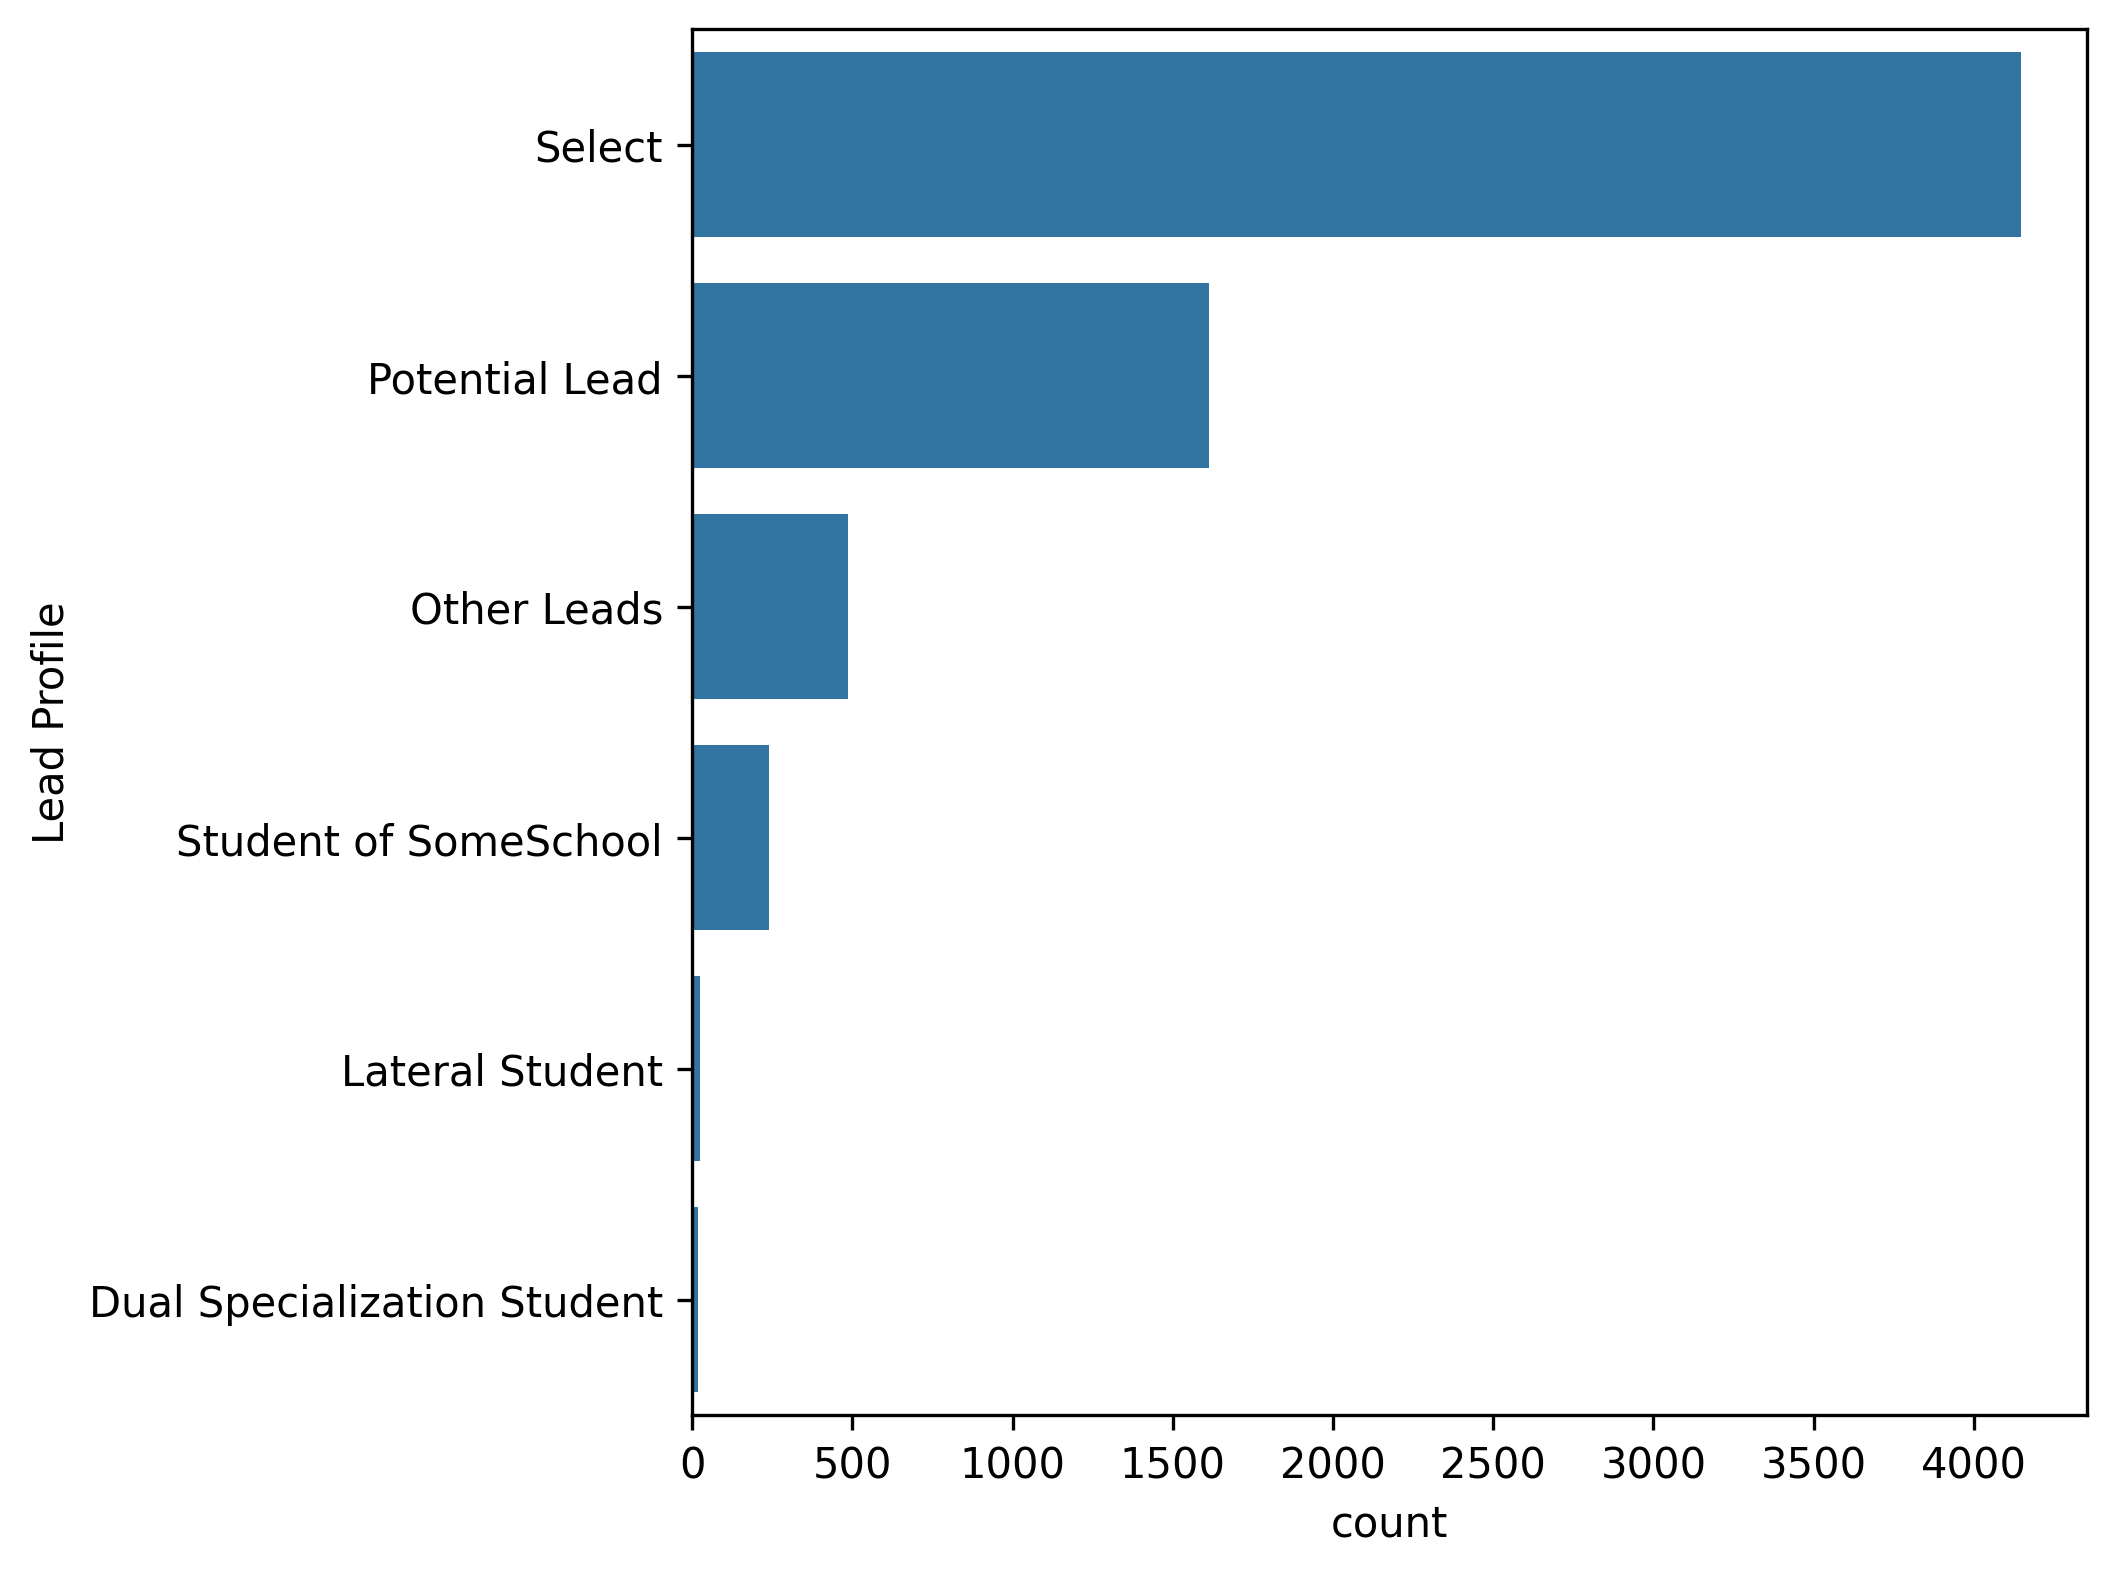

In [62]:
# Grafico de Distribucion de Lead Profile
plt.figure(figsize=(6,6), dpi= 300)
sns.countplot(y='Lead Profile', data= df, order = df['Lead Profile'].value_counts().index)

Una gran parte de los vsalores son "Select", lo cual es equivalente a un nulo.

In [63]:
# Reemplacemos Select por Desconocido
df['Lead Profile'].replace('Select', 'Desconocido', inplace=True)

C:\Users\dave1\AppData\Local\Temp\ipykernel_4992\1713878642.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Lead Profile'].replace('Select', 'Desconocido', inplace=True)


In [64]:
# Rellenemos los valores faltantes con Desconocido
df['Lead Profile'].fillna('Desconocido', inplace=True)

Manejo de nulos: City

City: La ciudad de cliente potencial

Evalue la distribucion de esta caracteristica para determinar el mejor metodo de imputacion de nulos.

<Axes: xlabel='count', ylabel='City'>

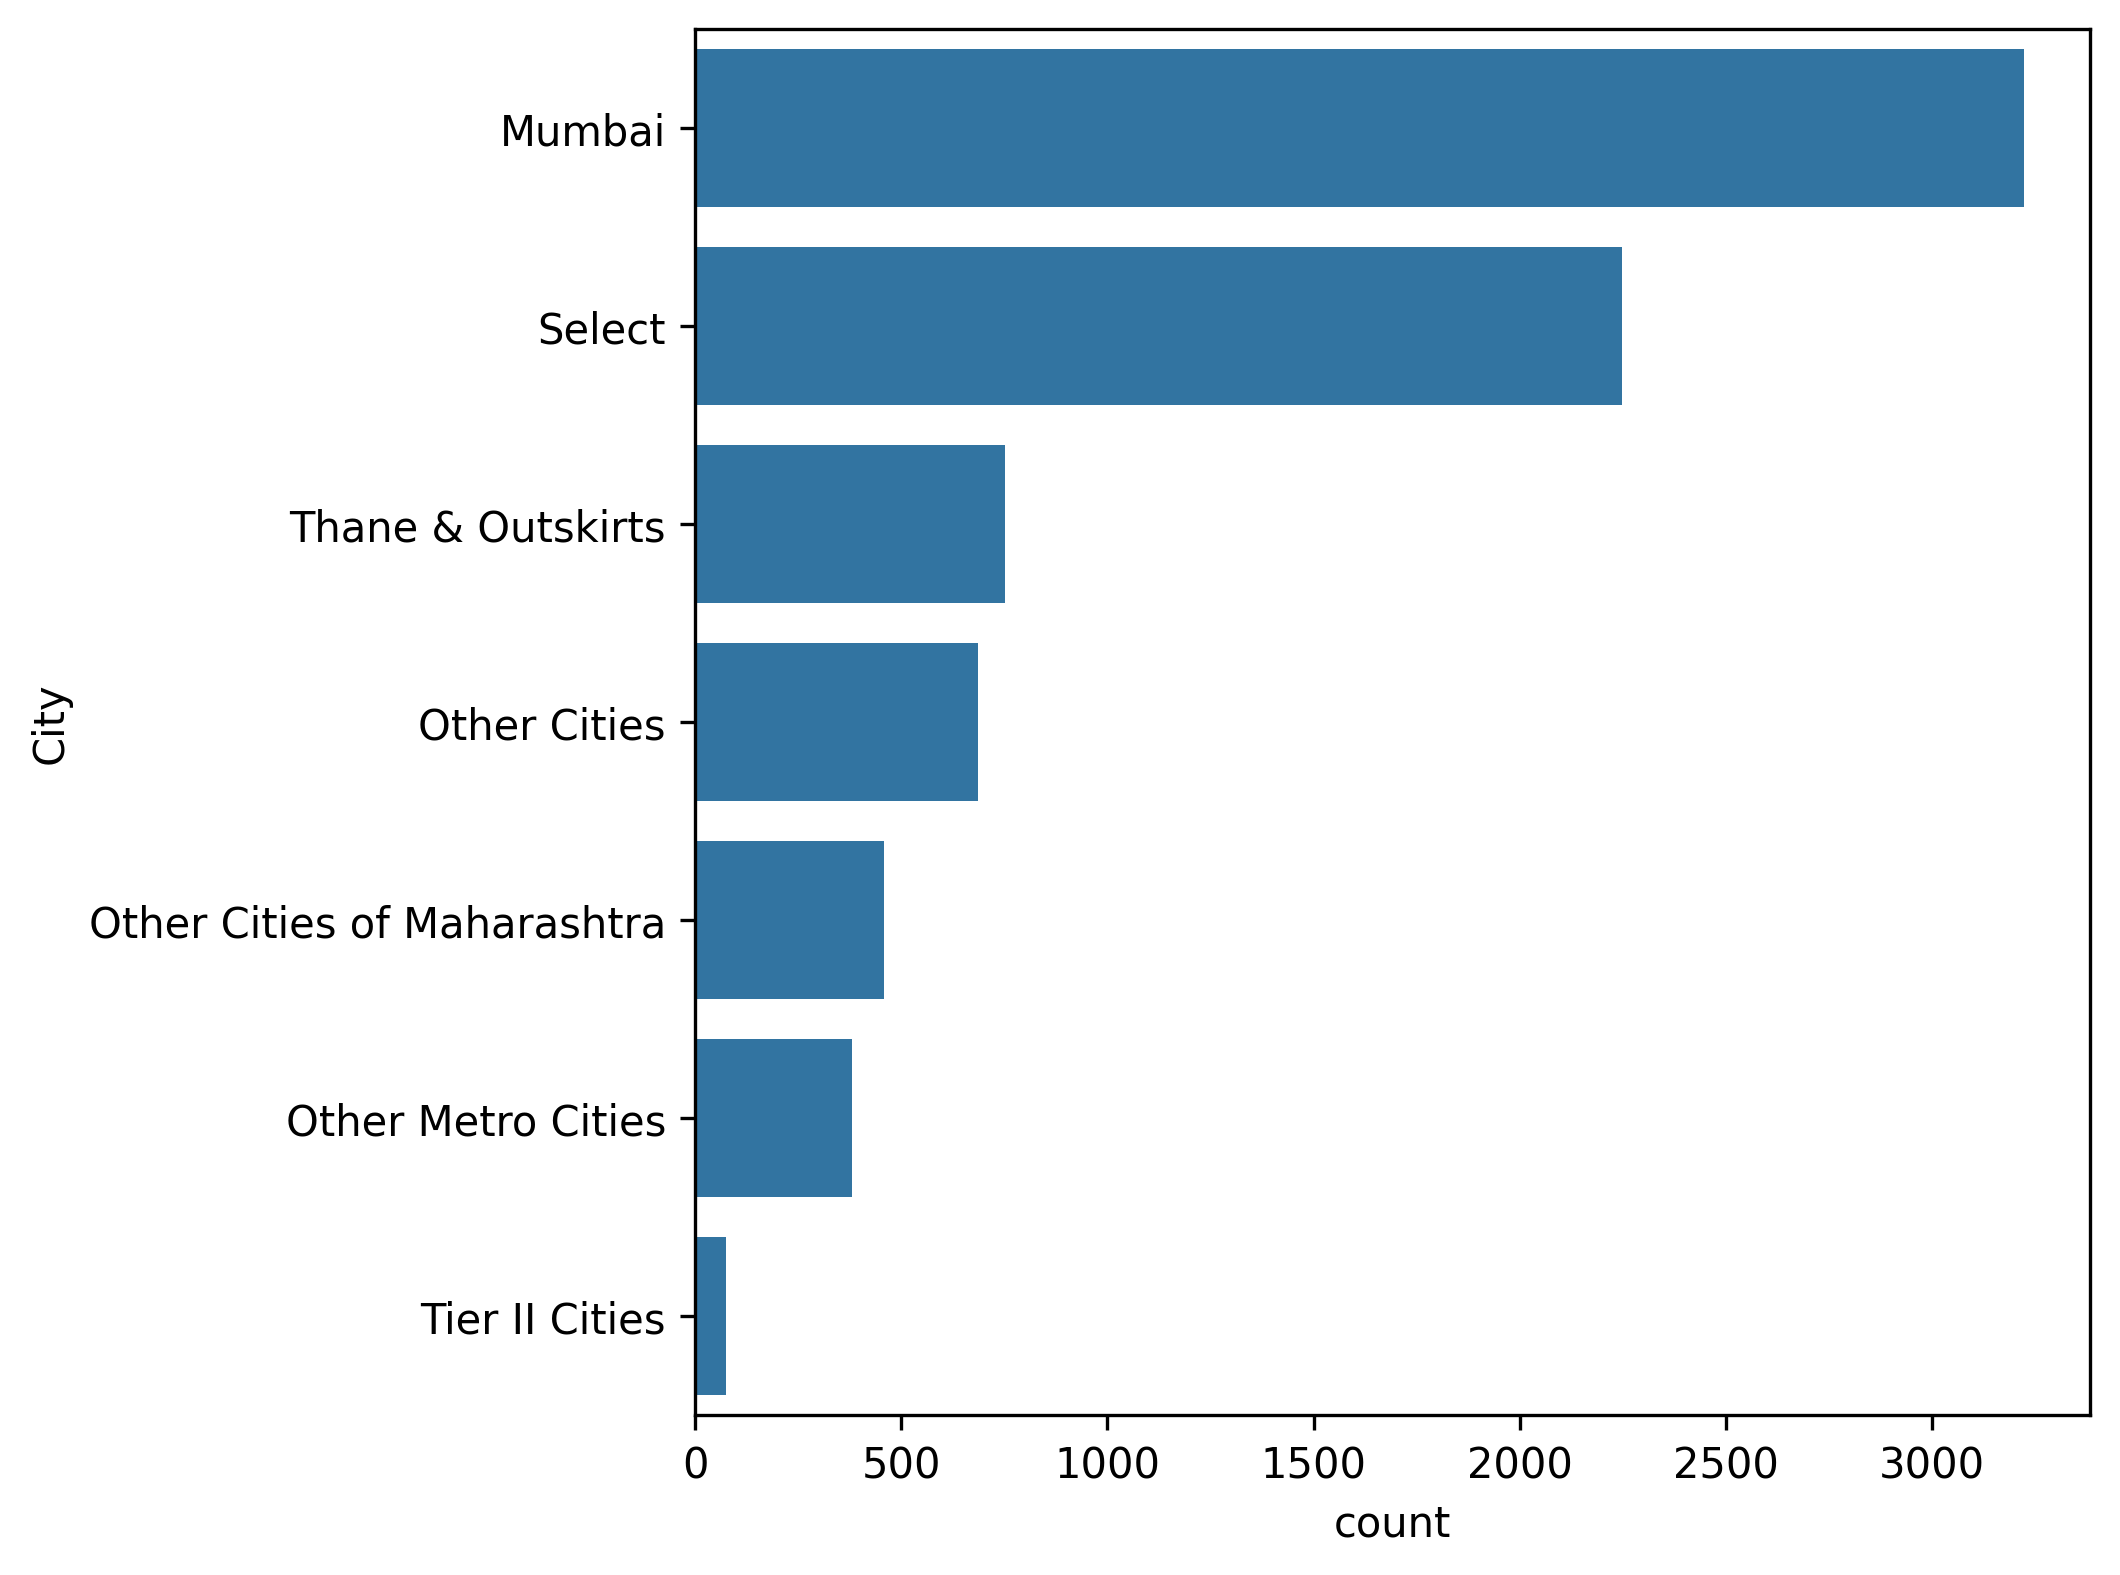

In [65]:
# Grafico de Distribucion de City
plt.figure(figsize=(6,6), dpi= 300)
sns.countplot(y='City', data= df, order = df['City'].value_counts().index)

Una gran parte de los valores son "Select", lo cual es equivalente a un nulo

In [67]:
# Reemplacemos Select por un Desconocido
df['City'].replace('Select', 'Desconocido', inplace=True)

C:\Users\dave1\AppData\Local\Temp\ipykernel_4992\2707975005.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['City'].replace('Select', 'Desconocido', inplace=True)


In [68]:
# Rellenamos los valores faltantes con desconocido
df['City'].fillna('Desconocido', inplace=True)

C:\Users\dave1\AppData\Local\Temp\ipykernel_4992\2853473917.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['City'].fillna('Desconocido', inplace=True)


Corrección de Tipo de Datos: I agree to pay the amount through cheque, A free copy of Mastering The Interview

I agree to pay the amount through cheque: Indica si el cliente ha acordado pagar el monto mediante cheque o no.

A free copy of Mastering The Interview: Indica si el cliente desea una copia gratuita de 'Mastering the Interview' o no.

Estas características serán más fáciles de manipular, interpretar y utilizar en un modelo al convertirlas en valores booleanos.

In [69]:
# Convertimos las variables Yes/No a booleanos
for c in ['I agree to pay the amount through cheque', 'A free copy of Mastering The Interview']:
    df[c] = df[c].replace('Yes', 1)
    df[c] = df[c].replace('No', 0)
    df[c] = df[c].astype(bool)

C:\Users\dave1\AppData\Local\Temp\ipykernel_4992\2567259810.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[c] = df[c].replace('No', 0)
C:\Users\dave1\AppData\Local\Temp\ipykernel_4992\2567259810.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[c] = df[c].replace('No', 0)


Correcion del tipo de datos: Object to Category

In [70]:
# Convertimos los datos tipo string a categorias

for c in df.columns:
    if df[c].dtype == 'object':
        df[c] = df[c].astype('category')

In [71]:
# visualizamos de nuevo la informacion del df
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9240 entries, 660737 to 579533
Data columns (total 34 columns):
 #   Column                                         Non-Null Count  Dtype   
---  ------                                         --------------  -----   
 0   Lead Origin                                    9240 non-null   category
 1   Lead Source                                    9240 non-null   category
 2   Do Not Email                                   9240 non-null   bool    
 3   Do Not Call                                    9240 non-null   bool    
 4   Converted                                      9240 non-null   bool    
 5   TotalVisits                                    9103 non-null   float64 
 6   Total Time Spent on Website                    9240 non-null   int64   
 7   Page Views Per Visit                           9103 non-null   float64 
 8   Last Activity                                  9240 non-null   category
 9   Country                                

Índices y Puntuaciones Asimétricas

Asymmetrique Activity Index: Un índice asignados a cada cliente basados en su actividad: alto, medio y bajo.

Asymmetrique Profile Index: Un índice asignados a cada cliente basados en su perfil: alto, medio y bajo.

Asymmetrique Activity Score: Una puntuación asignados a cada cliente basados en su actividad.

Asymmetrique Profile Score: Una puntuación asignados a cada cliente basados en su perfil.

Evalúe la distribución de cada característica para determinar el método de imputación de nulos más apropiado.

In [72]:
# Estadisticas descriptivas de los scores
estadisticas_scores = pd.DataFrame(
    {'Asymmetrique Activity Score':df['Asymmetrique Activity Score'].describe(),
     'Asymmetrique Profile Score': df['Asymmetrique Profile Score'].describe()})

In [73]:
# visualizamos el df que creamos 
estadisticas_scores

,Asymmetrique Activity Score,Asymmetrique Profile Score
count,5022.000000,5022.000000
mean,14.306252,16.344883
std,1.386694,1.811395
min,7.000000,11.000000
25%,14.000000,15.000000
50%,14.000000,16.000000
75%,15.000000,18.000000
max,18.000000,20.000000


Notamos que la mediana, esta un poco a la izquierda (es decir es menor) que la media en ambos casos, para confirmar, realizamos un histograma

In [74]:
# Graficamos la distribucion de los scores
# Creamos el df con las variables a visualizar
scores = ['Asymmetrique Activity Score', 'Asymmetrique Profile Score']

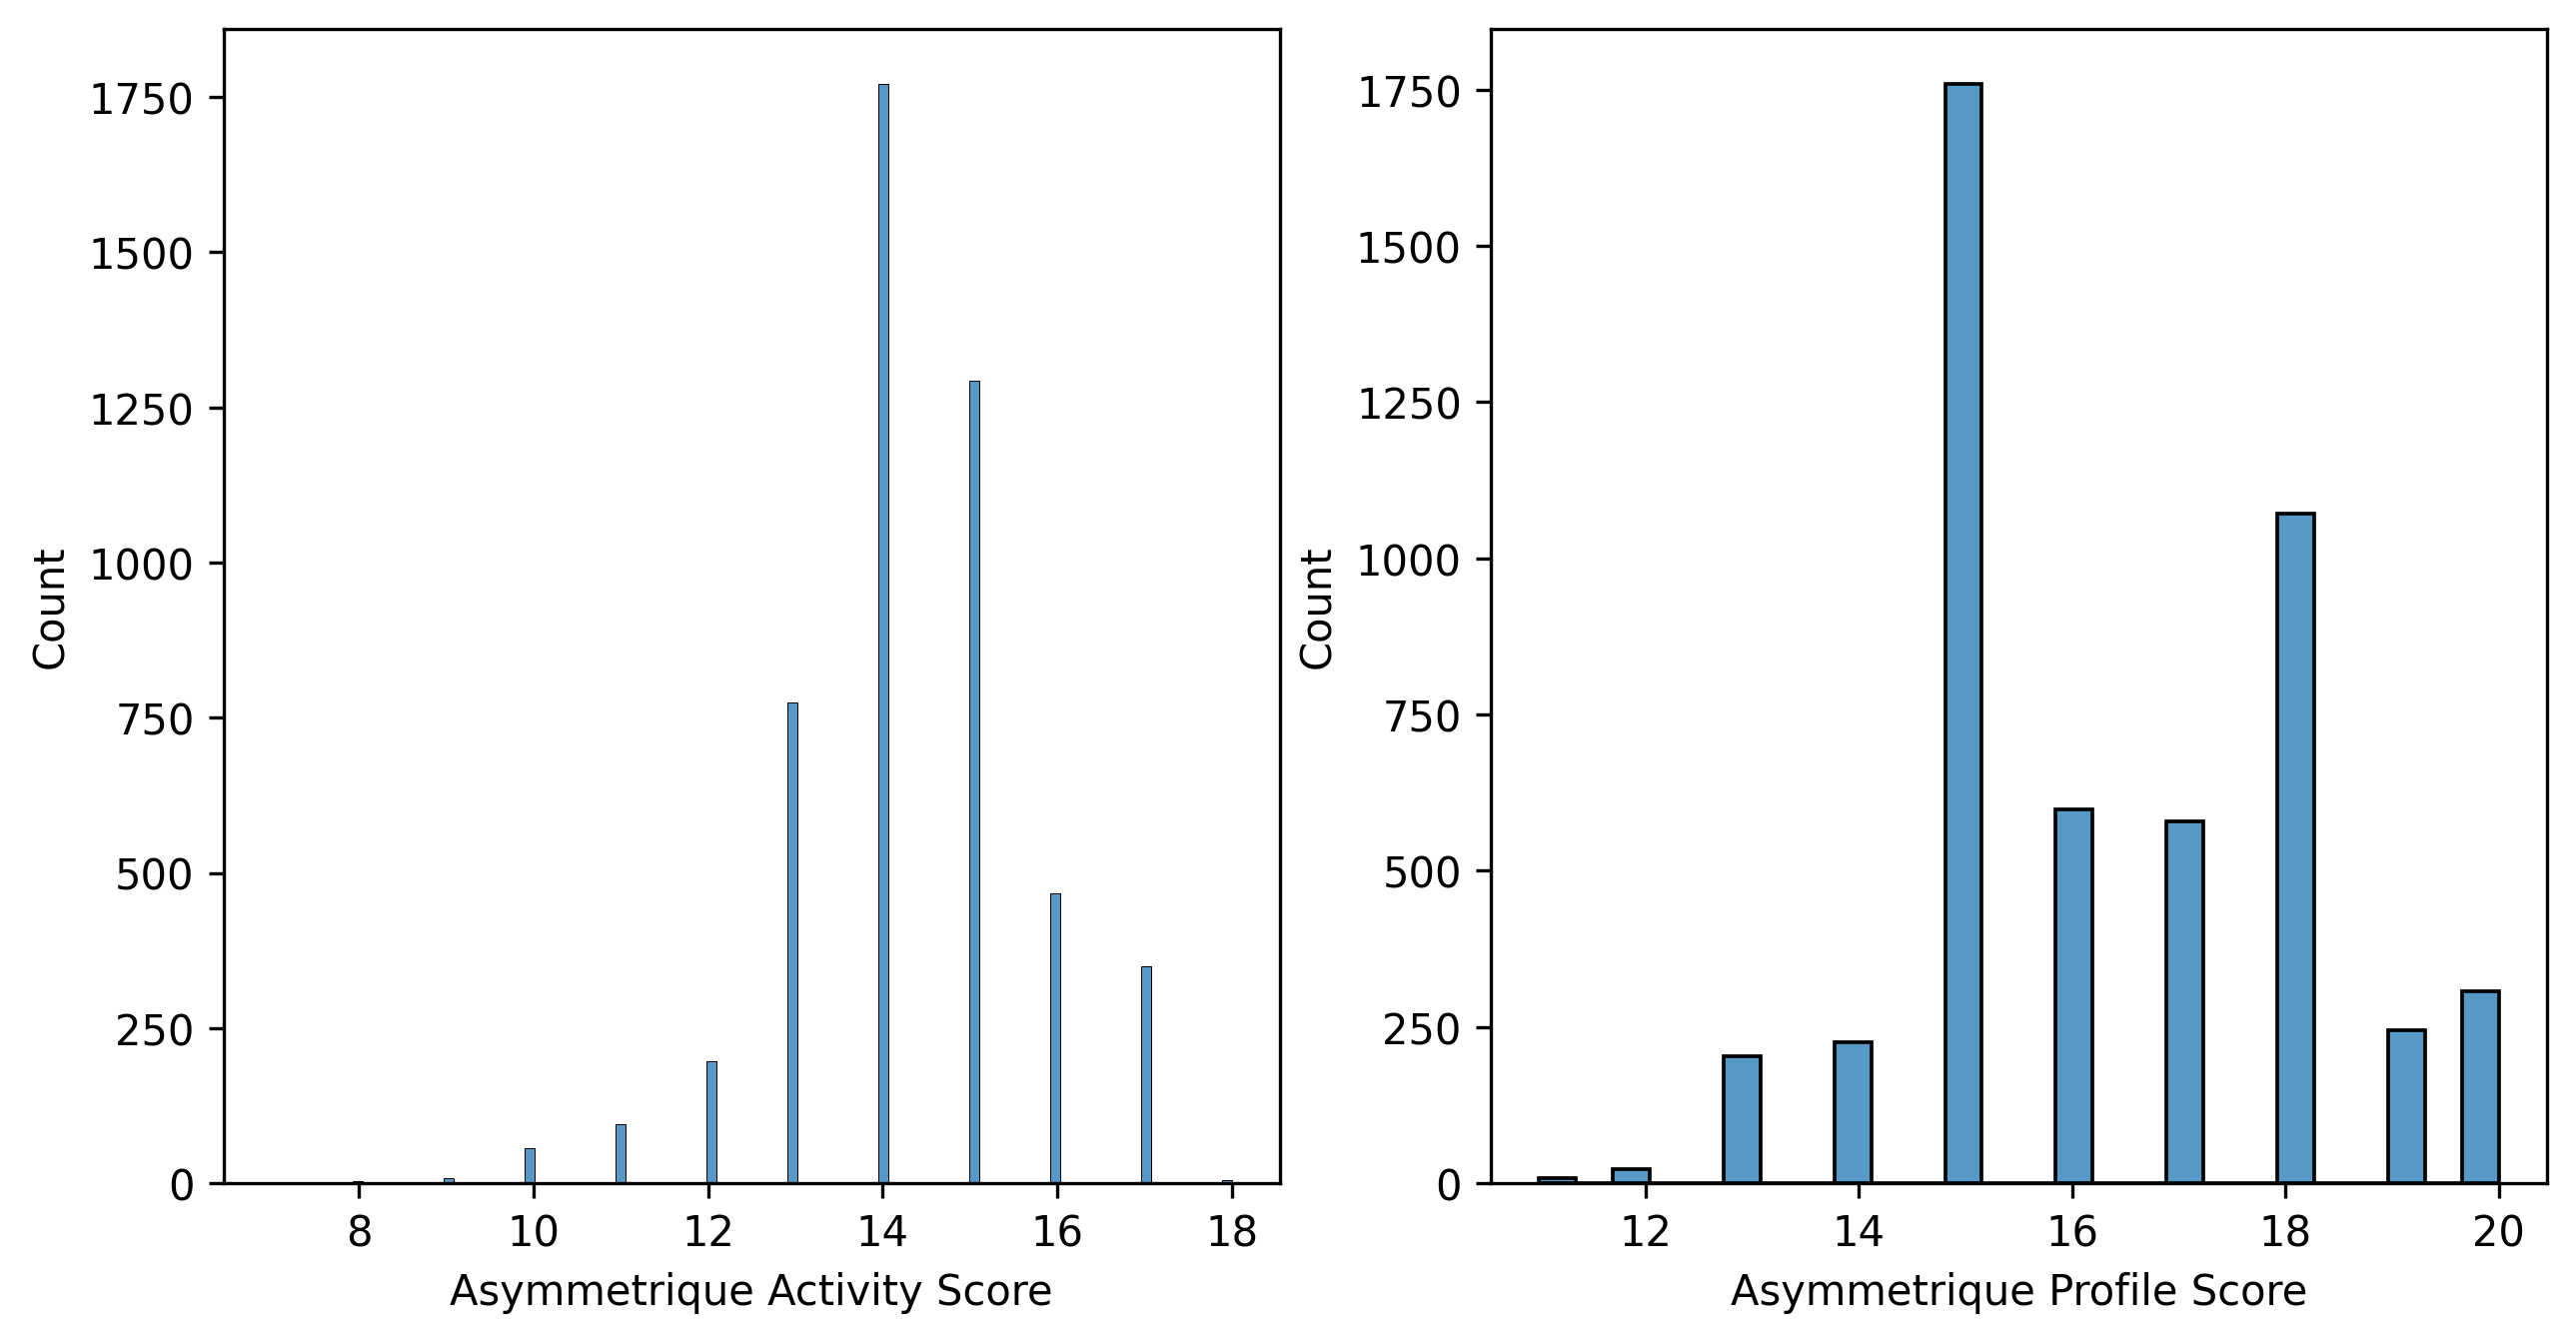

In [75]:
# Creamos un lazo for para graficar las dos vairbles
fig, ejes = plt.subplots(nrows=1, ncols=2, figsize=(10,5), dpi = 300)
for i in range(2):
    sns.histplot(x=scores[i],data = df, ax=ejes[i])

In [76]:
# Ambas estan sesgadas, por lo tanto seria mas apropiado rellenar los valores faltantes con la mediana en lugar de la media.
for s in scores:
    df[s].fillna(df[s].median(), inplace=True)

C:\Users\dave1\AppData\Local\Temp\ipykernel_4992\2555178539.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[s].fillna(df[s].median(), inplace=True)
C:\Users\dave1\AppData\Local\Temp\ipykernel_4992\2555178539.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, wh

In [77]:
# Realizamos un histogramao para los indices
indices = ['Asymmetrique Activity Index', 'Asymmetrique Profile Index']

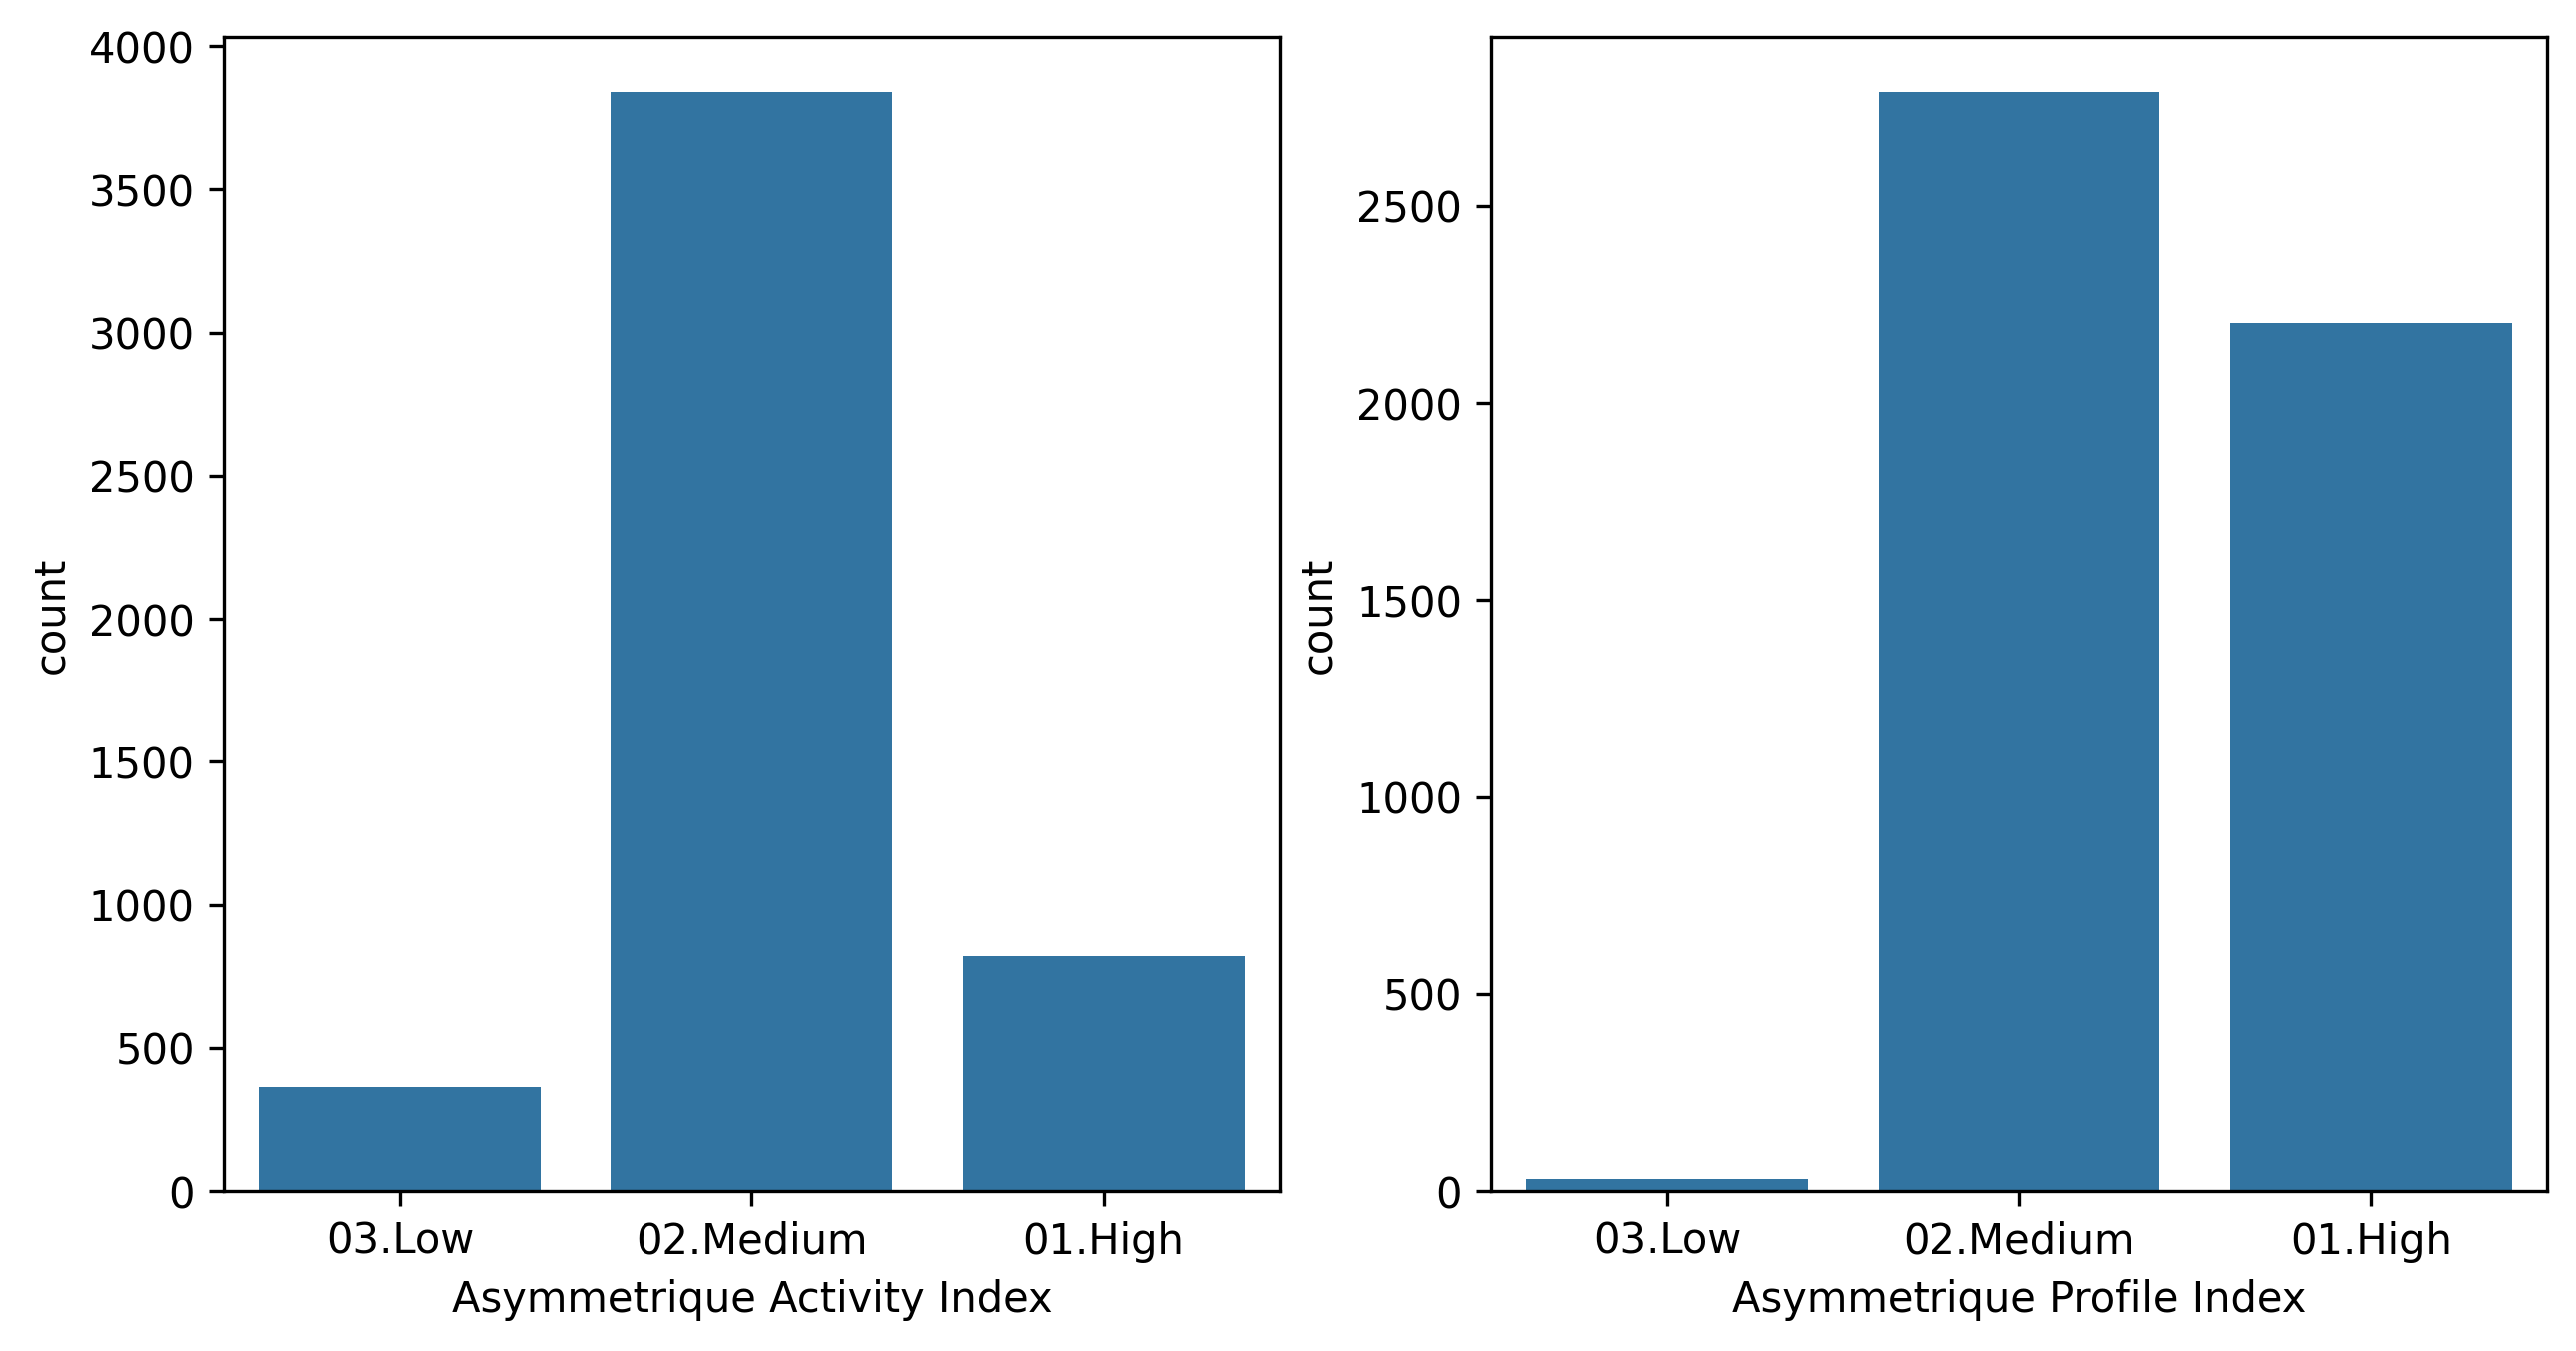

In [78]:
# Creamos el grafico con valor alto, medio y bajo 
fig, ejes = plt.subplots(nrows=1, ncols =2, figsize=(10,5), dpi = 300)
for i in range(2):
    sns.countplot(x=indices[i], data = df, ax=ejes[i], order = ['03.Low', '02.Medium', '01.High']) 

Parece que las caracteristicas del indice pueden simplemente estar agrupadas de acuerdo con la Puntuacion Asimetrica, en cuyo caso ambas caracteristicas del indice son redundantes. Podemos confirmar esto observando la puntuacion asimetrica media por el indice asimetrico

Agrupamos por el indice de actividad asimetrica

El metodo agg en Pandas se utiliza para aplicar una o varias funciones de agregacion a una serie de datos, En el contexto del codigo que escribimos, agg se usa despues de groupby para calcular la media ('mean') de la columna 'Asymetrique Activity Score' para cada grupo unico en 'Asymmetrique ASctivity Index'

In [79]:
agrupadmos_por_activity_index = df.groupby('Asymmetrique Activity Index').agg({'Asymmetrique Activity Score': 'mean'})

C:\Users\dave1\AppData\Local\Temp\ipykernel_4992\1733433714.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agrupadmos_por_activity_index = df.groupby('Asymmetrique Activity Index').agg({'Asymmetrique Activity Score': 'mean'})


In [80]:
# visualizamos el df
agrupadmos_por_activity_index

,Asymmetrique Activity Score
Asymmetrique Activity Index,
01.High,16.437272
02.Medium,14.134931
03.Low,11.290055


In [81]:
# Agrupamos por Indice Perfil Asimetrico
agrupadmos_por_profile_index = df.groupby('Asymmetrique Profile Index').agg({'Asymmetrique Profile Score': 'mean'})

C:\Users\dave1\AppData\Local\Temp\ipykernel_4992\1863899352.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agrupadmos_por_profile_index = df.groupby('Asymmetrique Profile Index').agg({'Asymmetrique Profile Score': 'mean'})


In [82]:
#Visualizamos el df creado 
agrupadmos_por_profile_index

,Asymmetrique Profile Score
Asymmetrique Profile Index,
01.High,18.128007
02.Medium,14.987446
03.Low,11.709677


Como se puede observar de los calculos anteriores, los valores de Asymmetrique Activity/Profile Index parecen simplemente agrupar los Asymmetrique Activity/Profile Scores, como resultado, las caracteristicas del indice son redundantes y pueden ser eliminadas

In [84]:
# Eliminamos las columnas del indice
df.drop(columns=['Asymmetrique Profile Index', 'Asymmetrique Activity Index'], axis=1, inplace=True)

In [85]:
# visualizamos el df
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9240 entries, 660737 to 579533
Data columns (total 32 columns):
 #   Column                                         Non-Null Count  Dtype   
---  ------                                         --------------  -----   
 0   Lead Origin                                    9240 non-null   category
 1   Lead Source                                    9240 non-null   category
 2   Do Not Email                                   9240 non-null   bool    
 3   Do Not Call                                    9240 non-null   bool    
 4   Converted                                      9240 non-null   bool    
 5   TotalVisits                                    9103 non-null   float64 
 6   Total Time Spent on Website                    9240 non-null   int64   
 7   Page Views Per Visit                           9103 non-null   float64 
 8   Last Activity                                  9240 non-null   category
 9   Country                                